## Logistic Regression - Complete
    

## How to find whether Logistic Regression to be applied?

<ol>
    <li> Is the dataset supervised ? (having output column?) </li>
    <li> Is the input data numeric? </li>
    <li> Is the input data linear? </li>
    <li> Is the output column categorical? </li>
    <li> Is the output column probabilistic? </li>
</ol>

<H4> Yes!... you may use logistic regression </H4>


####  Is the dataset Linear?
<ol> 
    <li> Use Correlation </li>
    <li> Plot scatter chart </li>
    <li> may use pair plots </li>
</ol>



In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("E:\\Online Courses\\ML Online\\Module 4\\Dataset\\Admission_Predict.csv")
print(df.shape)
print(df.info())

(400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.2+ KB
None


In [3]:
print(df[df['Chance of Admit']=='yes'].count())


Serial No.           367
GRE Score            367
TOEFL Score          367
University Rating    367
SOP                  367
LOR                  367
CGPA                 367
Research             367
Chance of Admit      367
dtype: int64


## Draw scatter plot


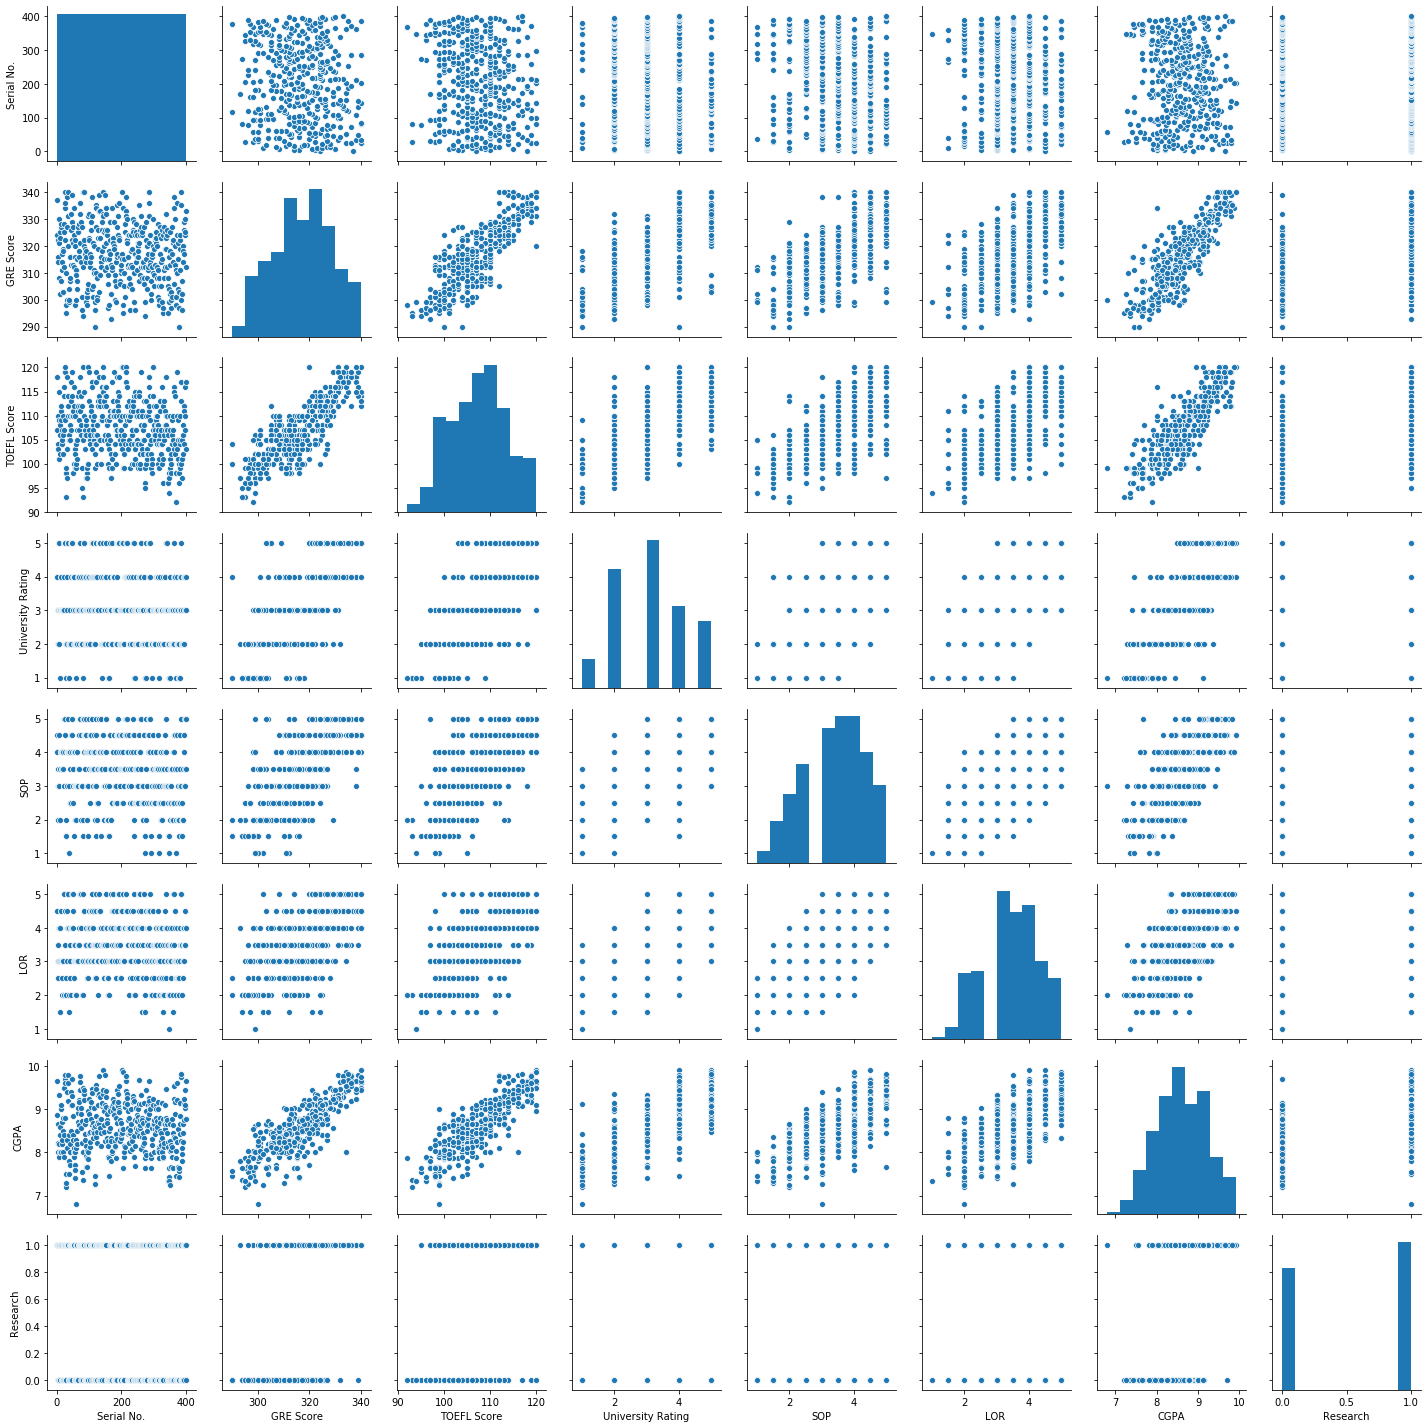

In [4]:
sb.pairplot(df)


                   Serial No.  GRE Score  TOEFL Score  University Rating  \
Serial No.           1.000000  -0.097526    -0.147932          -0.169948   
GRE Score           -0.097526   1.000000     0.835977           0.668976   
TOEFL Score         -0.147932   0.835977     1.000000           0.695590   
University Rating   -0.169948   0.668976     0.695590           1.000000   
SOP                 -0.166932   0.612831     0.657981           0.734523   
LOR                 -0.088221   0.557555     0.567721           0.660123   
CGPA                -0.045608   0.833060     0.828417           0.746479   
Research            -0.063138   0.580391     0.489858           0.447783   

                        SOP      LOR       CGPA  Research  
Serial No.        -0.166932 -0.088221 -0.045608 -0.063138  
GRE Score          0.612831  0.557555  0.833060  0.580391  
TOEFL Score        0.657981  0.567721  0.828417  0.489858  
University Rating  0.734523  0.660123  0.746479  0.447783  
SOP            

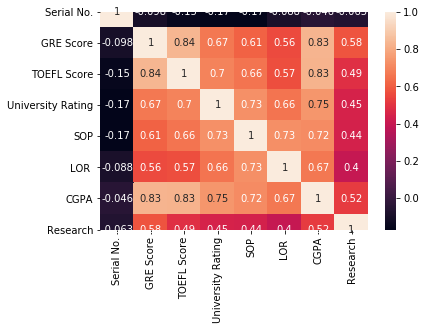

In [5]:
df1  = df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [8]:
df.drop(columns=['Serial No.'],inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,yes
1,324,107,4,4.0,4.5,8.87,1,yes
2,316,104,3,3.0,3.5,8.00,1,yes
3,322,110,3,3.5,2.5,8.67,1,yes
4,314,103,2,2.0,3.0,8.21,0,yes


In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    5
SOP                  0
LOR                  5
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### train & test

In [9]:
from sklearn import linear_model
regress = linear_model.LogisticRegression()
df2 = df.values
#print(df2)
train_x = (df2[:,0:7])
train_y = df2[:,7]
print(train_x)
print(train_y)


[[337 118 4 ... 4.5 9.65 1]
 [324 107 4 ... 4.5 8.87 1]
 [316 104 3 ... 3.5 8.0 1]
 ...
 [330 116 4 ... 4.5 9.45 1]
 [312 103 3 ... 4.0 8.78 0]
 [333 117 4 ... 4.0 9.66 1]]
['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no'
 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'y

### Minmax normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
train_x = ms.fit_transform(train_x)
print(train_x)

[[0.94       0.92857143 0.75       ... 0.875      0.91346154 1.        ]
 [0.68       0.53571429 0.75       ... 0.875      0.66346154 1.        ]
 [0.52       0.42857143 0.5        ... 0.625      0.38461538 1.        ]
 ...
 [0.8        0.85714286 0.75       ... 0.875      0.84935897 1.        ]
 [0.44       0.39285714 0.5        ... 0.75       0.63461538 0.        ]
 [0.86       0.89285714 0.75       ... 0.75       0.91666667 1.        ]]


### Regression line fitting

In [11]:
regress.fit (train_x,train_y)
# The coefficients y= m0x0+m1x1+...m11x11+c
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[ 1.84653573  1.95483918  0.24428078 -0.02699547  1.5526433   2.61487109
   0.44589894]]
Intercept:  [-1.47821059]


### Prediction

In [12]:
y_predicted = regress.predict(train_x)
for i in range(0,len(train_x)):
    print(train_y[i],y_predicted[i])
df['Pred']=y_predicted
df
df.to_csv("E:\\ML Online\\Module 4\\log_result_1.csv")

yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no no
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no no
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
no yes
no yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
no yes
no yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes
yes yes

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\ML Online\\Module 4\\log_result_1.csv'

### Plotting


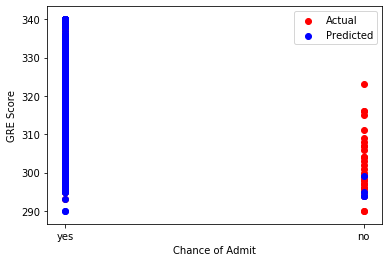

In [12]:
plt.scatter(df['Chance of Admit'],df['GRE Score'],color='red',label='Actual')
plt.scatter(df['Pred'],df['GRE Score'],color = 'blue',label = 'Predicted' )
plt.xlabel('Chance of Admit')
plt.ylabel('GRE Score')
plt.legend()
plt.show()

### Metrics

In [13]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(train_y, y_predicted))
print('Confusion Matrix\n',metrics.confusion_matrix(train_y,y_predicted))


Accucary: 0.93
Confusion Matrix
 [[  5  28]
 [  0 367]]



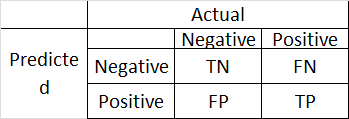

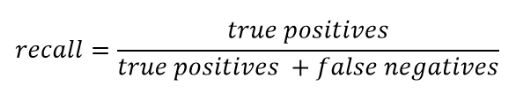

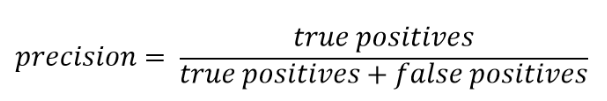

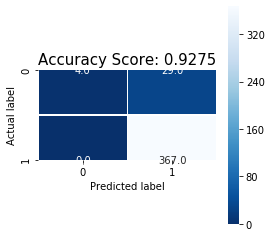

In [14]:
plt.figure(figsize=(4,4))
sb.heatmap(metrics.confusion_matrix(train_y,y_predicted), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(train_y, y_predicted))
plt.title(all_sample_title, size = 15);

In [15]:
from sklearn.metrics import classification_report
print(classification_report(train_y,y_predicted))

              precision    recall  f1-score   support

          no       1.00      0.12      0.22        33
         yes       0.93      1.00      0.96       367

   micro avg       0.93      0.93      0.93       400
   macro avg       0.96      0.56      0.59       400
weighted avg       0.93      0.93      0.90       400

